Grade=100/100

# Science Image Calibration LAB 5 #
Dylan Ma — ASTRO 361

November 1st, 2016


# INTRODUCTION #

This laboratory assignment demonstrates the calibration of a science image using bias and flat frames. Simple methods were used to reduce noise, spherical abberations, and other optical and sensor defects for a higher-value science product. The result of this calibration is compared with a professionally calibrated image.

Astrometric and photometric calibrations were then completed through the use of standalone software and tools. The processes and results are described below.

# METHOD #



In [32]:
#Import relevant libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
import sys
from astropy.io import fits
import matplotlib
%matplotlib inline
import os
import pylab


import matplotlib.image as mpimg

In [33]:
# Create empty vectors for each of ten bias and flat frames to be read in to

bias = np.empty(shape=(10,4096,2136),dtype=np.float64)
flats = np.empty(shape=(10,4096,2136),dtype=np.float64)

# Retrieve bias and flat frames using path to file

for j in range(79, 88):
    a = fits.getdata('/Users/dylanma/Desktop/lsa-ast361/Work/dylanma/lab5/data/kp2885' + str(j) + '.fits.fz')
    bias[j-79,:,:] = a
    
for j in range(13, 22):
    b = fits.getdata('/Users/dylanma/Desktop/lsa-ast361/Work/dylanma/lab5/data/kp2886' + str(j) + '.fits.fz')
    flats[j-13,:,:] = b    

# Retrieve uncalibrated science image
    
science_image = fits.getdata('/Users/dylanma/Desktop/lsa-ast361/Work/dylanma/lab5/data/kp289015.fits.fz')

In [34]:
# Retrieve NOAO calibrated image and NOAO flat

NOAO_calibrated = fits.getdata('/Users/dylanma/Desktop/lsa-ast361/Work/dylanma/lab5/data/tu942074.fits.fz')

NOAO_flat = fits.getdata('/Users/dylanma/Desktop/lsa-ast361/Work/dylanma/lab5/data/tu941182.fits.fz')

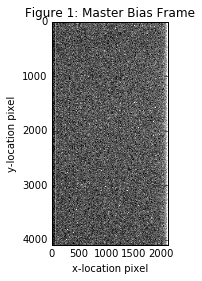

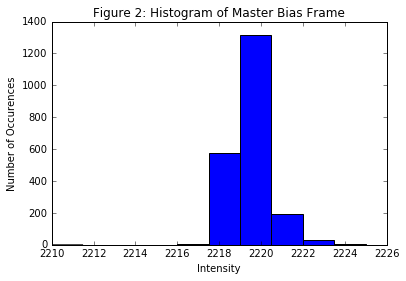

In [35]:
# Part A

sum_bias = np.zeros(shape=(4096,2136),dtype=np.float64)
master_bias = np.zeros(shape=(4096,2136),dtype=np.float64)


for i in range (0, 10):
    sum_bias = bias[i, :, :] + sum_bias

master_bias = sum_bias / 10


plt.imshow(master_bias,vmin = 2218, vmax = 2222)
plt.title('Figure 1: Master Bias Frame')
plt.xlabel('x-location pixel')
plt.ylabel('y-location pixel')
plt.show()

plt.hist(master_bias[2000,:],range=[2210, 2225])
plt.title('Figure 2: Histogram of Master Bias Frame')
plt.xlabel('Intensity')
plt.ylabel('Number of Occurences')
plt.show()


In [36]:
#Part B

# Calculate the mean value of the bias

meanValue_bias = np.sum(master_bias)/(4096*2136)
np.disp('Mean Bias Value: ') 
print(meanValue_bias)

stanDev_bias = math.sqrt( np.mean(np.square(master_bias)) - np.square(meanValue_bias) )
np.disp('Standard Deviation of the Master Bias: ') 
print(stanDev_bias)

Mean Bias Value: 
2219.38957785
Standard Deviation of the Master Bias: 
4.12087293797


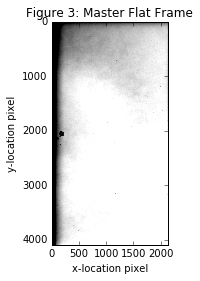

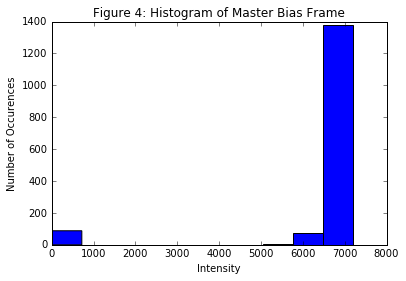

In [37]:
# Part C

sum_flats = np.zeros((4096,2136))

for i in range (0, 9):
    sum_flats = (flats[i, :, :] - master_bias) + sum_flats 

master_flat = sum_flats / 10


plt.imshow(master_flat,vmin = 6000, vmax = 7100)
plt.title('Figure 3: Master Flat Frame')
plt.xlabel('x-location pixel')
plt.ylabel('y-location pixel')
plt.show()

plt.hist(master_flat[2000,:],range=[0, 7200])
plt.title('Figure 4: Histogram of Master Bias Frame')
plt.xlabel('Intensity')
plt.ylabel('Number of Occurences')
plt.show()

In [38]:
#Part D

meanValue_flats = np.mean(master_flat)
#meanValue_flats = np.sum(master_flat)/(4096*2136)
np.disp('Mean Flat Value: ') 
print(meanValue_flats)

stanDev_flat = math.sqrt( np.mean(np.square(master_flat)) - np.square(meanValue_flats) )
np.disp('Standard Deviation of the Master Flat: ') 
print(stanDev_flat)

Mean Flat Value: 
6753.26571324
Standard Deviation of the Master Flat: 
1394.14919708


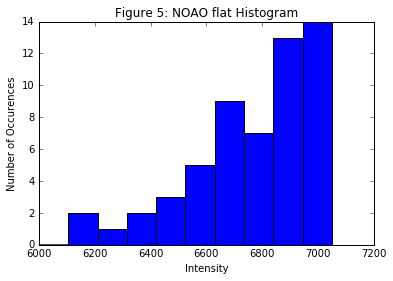

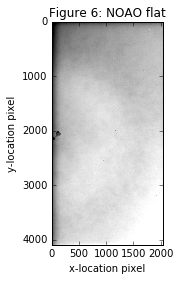

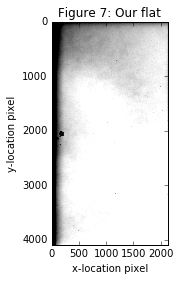

In [30]:
# Part E

plt.hist(NOAO_flat[2000,:],range=[6000, 7050])
plt.title('Figure 5: NOAO flat Histogram')
plt.xlabel('Intensity')
plt.ylabel('Number of Occurences')
plt.show()

plt.imshow(NOAO_flat,vmin = 6100, vmax = 8300)
plt.title('Figure 6: NOAO flat')
plt.xlabel('x-location pixel')
plt.ylabel('y-location pixel')
plt.show()

plt.imshow(master_flat,vmin = 6000, vmax = 7100)
plt.title('Figure 7: Our flat')
plt.xlabel('x-location pixel')
plt.ylabel('y-location pixel')
plt.show()



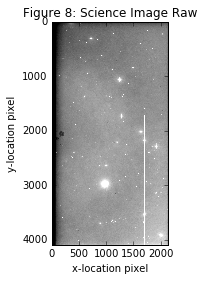

In [39]:
plt.imshow(science_image, vmin = 8000, vmax = 11000)
plt.title('Figure 8: Science Image Raw')
plt.xlabel('x-location pixel')
plt.ylabel('y-location pixel')
plt.show()

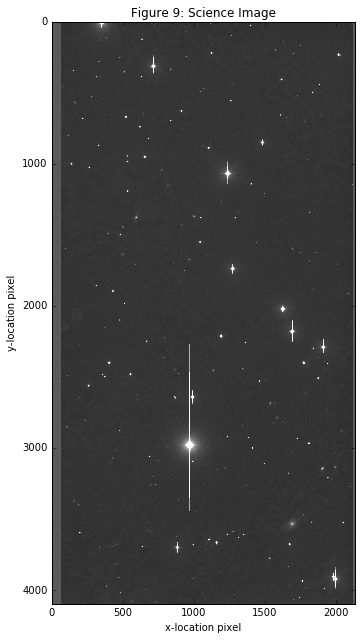

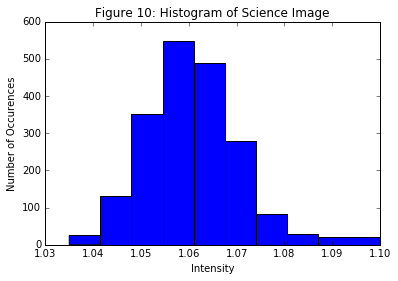

In [40]:
# Part F

master_flat1 = master_flat

master_flat1[np.where(master_flat1 < 1)] = 1.0

master_flat1 = np.reshape(master_flat1, (4096,2136))

science_calibrated = science_image

# Subtract off master bias, then divide by master flat

science_calibrated = (science_image - master_bias) / master_flat1
plt.figure(figsize=(20,10.429))
plt.imshow(science_calibrated, vmin = 0.88, vmax = 1.74, cmap=pylab.gray())
plt.title('Figure 9: Science Image')
plt.xlabel('x-location pixel')
plt.ylabel('y-location pixel')
plt.show()

plt.hist(science_calibrated[2000,:],range=[1.035, 1.1])
plt.title('Figure 10: Histogram of Science Image')
plt.xlabel('Intensity')
plt.ylabel('Number of Occurences')
plt.show()

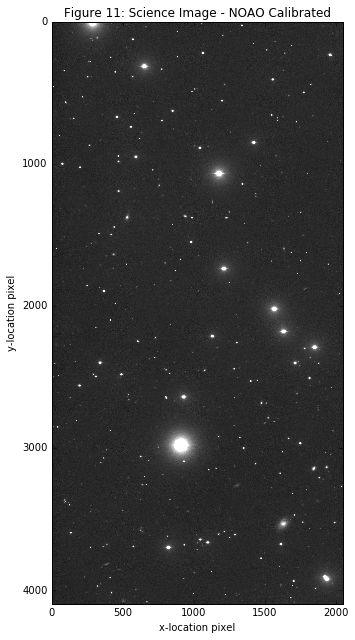

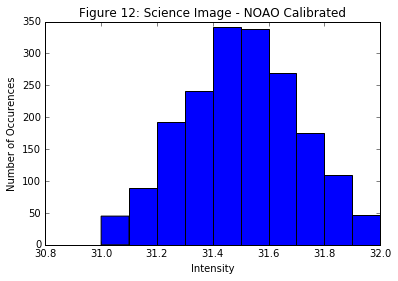

In [14]:
plt.figure(figsize=(20,10.429))
plt.imshow(NOAO_calibrated, vmin = 30, vmax = 39, cmap=pylab.gray())
plt.title('Figure 11: Science Image - NOAO Calibrated')
plt.xlabel('x-location pixel')
plt.ylabel('y-location pixel')
plt.show()

plt.hist(NOAO_calibrated[2000,:], range = [31.0, 32])
plt.title('Figure 12: Science Image - NOAO Calibrated')
plt.xlabel('Intensity')
plt.ylabel('Number of Occurences')
plt.show()

In [42]:
# Write to desktop a fits file of the final calibrated image

fits.writeto('/Users/dylanma/Desktop/calibrated.fits', science_calibrated)

# Part 2 #

1.a.

Catalog objects do not initially appear on the image.

1.b. Loaded objects do not initially lay on top of the astronomical objects in the image. This is because the astronomical (calibrated science) image does not yet contain RA/DEC information. 

To remedy this, the RA/DEC of the centre pixel of the NOAO calibrated image is obtained, then manually inputted into the header of the calibrated science image. 

1.c. Important keyword-value pairs from the header include the RA/DEC or other coordinates for the centre pixel of the image. They describe the location in the sky that centre pixel is measuring.

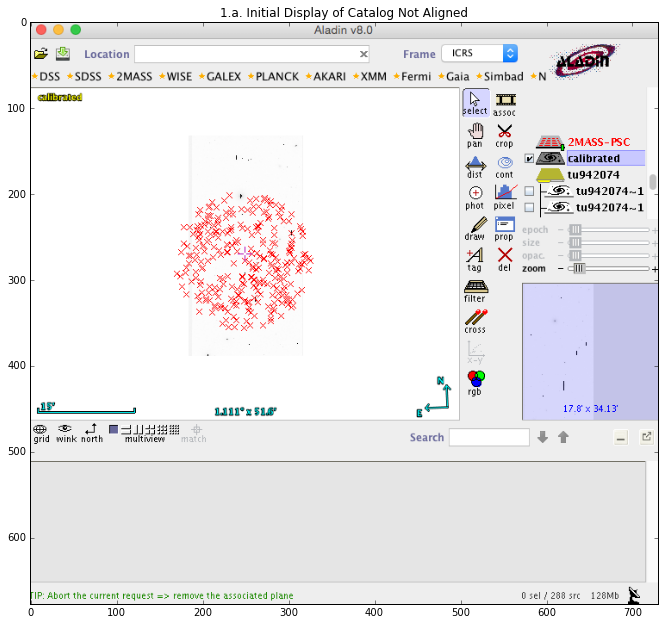

In [61]:
img1 = mpimg.imread('/Users/dylanma/Desktop/lsa-ast361/Work/dylanma/lab5/data/objects1.png')
plt.figure(figsize=(20,10.429))
imgplot1 = plt.imshow(img1)
plt.title('1.a. Initial Display of Catalog Not Aligned')
plt.show()

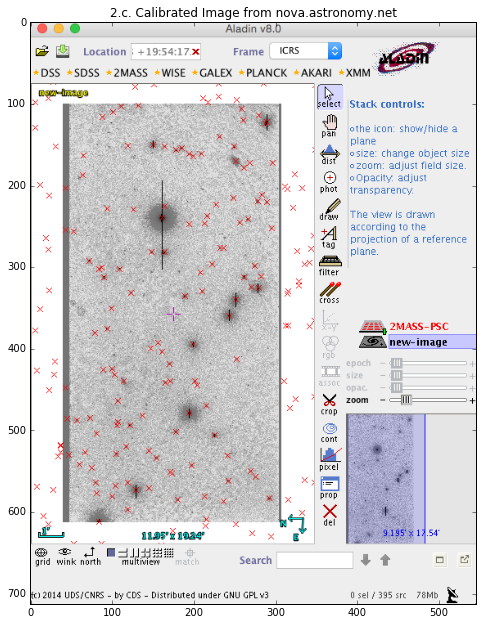

In [62]:
img4 = mpimg.imread('/Users/dylanma/Desktop/lsa-ast361/Work/dylanma/lab5/data/objects4.png')
plt.figure(figsize=(20,10.429))
imgplot4 = plt.imshow(img4)
plt.title('2.c. Calibrated Image from nova.astronomy.net')
plt.show()

2.d.  The WCS is the 'World Coordinate System' that describes the celestial location of any particular pixel in an image. This is important for astronomy because the data needs to be attributable to a particular celestial object at a particular location.

NAXIS = Number of axes

CRPIX = Centre pixel, coordinates of pixel

EQUINOX = Equinox of observation coordinates

CRVAL = Centre pixel, celestial coordinates

CTYPE = Data on WCS transformation of axes

CDN_M = N x M array with astrometric parameters

2.e. The new WCS differs from the old WCS by 

3.b. More sources are identified by Aladin than are included in the 2MASS PSC catalog.

3.c. 

MAG_ISO = magnitude of objects relative to other objects on the image
ALPHA_J2000 = Right ascension of object
DELTA_J2000 = Declination of object

Magnitudes are not correct; this is identified by the very low negative numbers.


4.b.  

The data is coming from both the catalog and from the original science image header. 
The magnitudes are not the same. The RA/DEC are very similar.

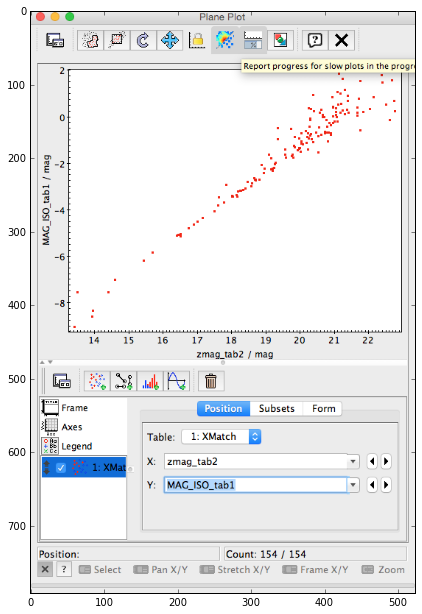

In [63]:
#  4.d.

initial = mpimg.imread('/Users/dylanma/Desktop/lsa-ast361/Work/dylanma/lab5/data/initial.png')
plt.figure(figsize=(20,10.429))
imgplot5 = plt.imshow(initial)
plt.show()

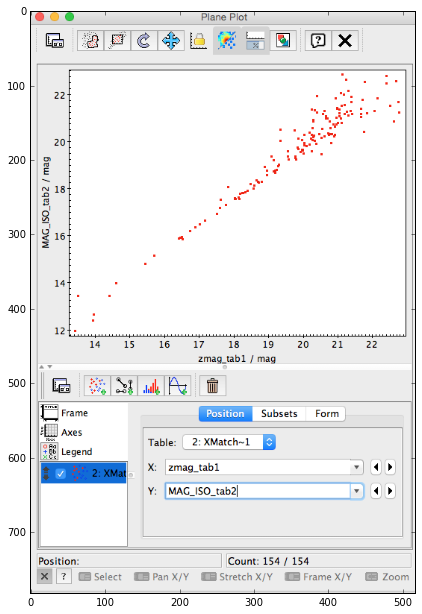

In [64]:
#  4.e.   Final Calibrated Image

final = mpimg.imread('/Users/dylanma/Desktop/lsa-ast361/Work/dylanma/lab5/data/final.png')
plt.figure(figsize=(20,10.429))
imgplot5 = plt.imshow(final)
plt.show()

# Conclusion #

The science image was calibrated through the use of 10 bias and 10 flat frames. Each of these sets was used to create a master frame, which was the subtracted and divided out of the original science image, respectively. 

The following values were computed:

Mean Bias Value: 
2219.38957785


Standard Deviation of the Master Bias: 
4.12087293797

Using Aladin, astrometric calibrations were completed, such that objects on the science image are now identifiable. This was done by matching a catalog of known objects and positions to those identified in the science image, assigning and RA and DEC for each pixel.

Finally, TOPCAT was used to photometrically calibrate the science image, by changing the Mag Zero Point of the catalog to be equal to that of the science image.

These processes are some of those necessary to add value to raw data obtained during astronomical observations. 
